In [2]:
import sqlite3
import pandas as pd

In [3]:
conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [4]:
movie_gross = pd.read_csv ('bom.movie_gross.csv')   

movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
movie_basics = pd.read_sql("""
    SELECT *
    FROM movie_basics;
    """, conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross,title
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",None,None
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",None,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",None,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",None,None


In [6]:
movie_ratings = pd.read_sql("""
    SELECT *
    FROM movie_ratings;
    """, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
movie_basics = movie_gross.merge(movie_basics, how='inner', left_on='title', right_on='primary_title')
movie_basics.head()

,title_x,studio,domestic_gross_x,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross_y,title_y
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",None,None
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",None,None
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",None,None
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",None,None
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",None,None


In [8]:
movie_basics.drop(columns=['primary_title', 'original_title', 'studio', 'title_y', 'domestic_gross_y', 'foreign_gross'])

,title_x,domestic_gross_x,year,movie_id,start_year,runtime_minutes,genres
0,Toy Story 3,415000000.0,2010,tt0435761,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,292600000.0,2010,tt1375666,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,238700000.0,2010,tt0892791,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,300500000.0,2010,tt1325004,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,312400000.0,2010,tt1228705,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...
3361,Souvenir,11400.0,2018,tt2389092,2014,86.0,"Comedy,Romance"
3362,Souvenir,11400.0,2018,tt3478898,2014,86.0,Documentary
3363,Beauty and the Dogs,8900.0,2018,tt6776572,2017,100.0,"Crime,Drama,Thriller"
3364,The Quake,6200.0,2018,tt6523720,2018,106.0,"Action,Drama,Thriller"


In [9]:
movie_basics.rename(columns={'title_x': 'title', 'domestic_gross_x': 'domestic_gross'}, inplace=True)
movie_basics.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross_y,title_y
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",None,None
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",None,None
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",None,None
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",None,None
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",None,None


In [10]:
movie_basics.drop(columns=['foreign_gross','domestic_gross_y', 'title_y',])

,title,studio,domestic_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
3361,Souvenir,Strand,11400.0,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance"
3362,Souvenir,Strand,11400.0,2018,tt3478898,Souvenir,Souvenir,2014,86.0,Documentary
3363,Beauty and the Dogs,Osci.,8900.0,2018,tt6776572,Beauty and the Dogs,Aala Kaf Ifrit,2017,100.0,"Crime,Drama,Thriller"
3364,The Quake,Magn.,6200.0,2018,tt6523720,The Quake,Skjelvet,2018,106.0,"Action,Drama,Thriller"


In [11]:
imbd_df= pd.read_sql("""

SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;
""", conn)
imbd_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross,title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",None,None,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",None,None,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,None,None,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",None,None,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",None,None,6.5,119


In [12]:
imbd_df['genres'] = imbd_df['genres'].str.split(',')
imbd_genres_df = imbd_df.explode('genres')

In [13]:
imbd_genres_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross,title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,None,None,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,None,None,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,None,None,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,None,None,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,None,None,7.2,43
...,...,...,...,...,...,...,...,...,...,...
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,None,None,8.7,136
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Family,None,None,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,None,None,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,None,None,6.6,5


In [14]:
Same_movie_titles = []
for title in imbd_df['primary_title'].unique(): 
    if title in movie_gross['title'].unique():
        Same_movie_titles.append(title)

In [15]:
print(Same_movie_titles[0:5])
len(Same_movie_titles)

['Wazir', 'On the Road', 'The Secret Life of Walter Mitty', 'A Walk Among the Tombstones', 'Jurassic World']


2598

In [16]:
movie_basics = movie_gross.merge(movie_basics, how='inner', left_on='title', right_on='primary_title', )
movie_basics.head()

,title_x,studio_x,domestic_gross_x,foreign_gross_x,year_x,title_y,studio_y,domestic_gross_y,foreign_gross_y,year_y,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,domestic_gross_y,title_y
0,Toy Story 3,BV,415000000.0,652000000,2010,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",None,None
1,Inception,WB,292600000.0,535700000,2010,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",None,None
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",None,None
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",None,None
4,Iron Man 2,Par.,312400000.0,311500000,2010,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",None,None


In [17]:
movie_basics = movie_basics.drop(columns=
                  ['studio_y',
                   'domestic_gross_y', 
                   'foreign_gross_y',
                   'year_y',
                   'original_title',
                   'domestic_gross_y',
                   'title_y'])
movie_basics

,title_x,studio_x,domestic_gross_x,foreign_gross_x,year_x,movie_id,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
3365,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,2014,86.0,"Comedy,Romance"
3366,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,2014,86.0,Documentary
3367,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,2017,100.0,"Crime,Drama,Thriller"
3368,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,2018,106.0,"Action,Drama,Thriller"


In [18]:
movie_basics

,title_x,studio_x,domestic_gross_x,foreign_gross_x,year_x,movie_id,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
3365,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,2014,86.0,"Comedy,Romance"
3366,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,2014,86.0,Documentary
3367,Beauty and the Dogs,Osci.,8900.0,NaN,2018,tt6776572,Beauty and the Dogs,2017,100.0,"Crime,Drama,Thriller"
3368,The Quake,Magn.,6200.0,NaN,2018,tt6523720,The Quake,2018,106.0,"Action,Drama,Thriller"


In [19]:
import numpy as np

In [20]:
# Convert domestic_gross_x column to int dtype.
movie_basics['domestic_gross_x'].dtypes

dtype('float64')

In [21]:
movie_basics['domestic_gross_x'] = movie_basics['domestic_gross_x'].fillna(0).astype(int)
movie_basics['domestic_gross_x']

0       415000000
1       292600000
2       238700000
3       300500000
4       312400000
          ...    
3365        11400
3366        11400
3367         8900
3368         6200
3369         1700
Name: domestic_gross_x, Length: 3370, dtype: int64

In [22]:
movie_basics_df = movie_basics.drop(columns=
                  ['title_x',
                   'movie_id',
                   'primary_title',
                   'start_year',
                   'runtime_minutes',
                   'genres'])
movie_basics_df

,studio_x,domestic_gross_x,foreign_gross_x,year_x
0,BV,415000000,652000000,2010
1,WB,292600000,535700000,2010
2,P/DW,238700000,513900000,2010
3,Sum.,300500000,398000000,2010
4,Par.,312400000,311500000,2010
...,...,...,...,...
3365,Strand,11400,NaN,2018
3366,Strand,11400,NaN,2018
3367,Osci.,8900,NaN,2018
3368,Magn.,6200,NaN,2018


In [23]:
movie_basics_df = movie_basics_df.rename(columns = {"studio_x": "studio", "domestic_gross_x": "domestic gross"})
movie_basics_df

,studio,domestic gross,foreign_gross_x,year_x
0,BV,415000000,652000000,2010
1,WB,292600000,535700000,2010
2,P/DW,238700000,513900000,2010
3,Sum.,300500000,398000000,2010
4,Par.,312400000,311500000,2010
...,...,...,...,...
3365,Strand,11400,NaN,2018
3366,Strand,11400,NaN,2018
3367,Osci.,8900,NaN,2018
3368,Magn.,6200,NaN,2018


In [24]:
movie_basics_df['domestic gross'].describe()

count    3.370000e+03
mean     2.961750e+07
std      6.510773e+07
min      0.000000e+00
25%      1.242500e+05
50%      1.800000e+06
75%      3.120000e+07
max      7.001000e+08
Name: domestic gross, dtype: float64

In [25]:
movie_basics

,title_x,studio_x,domestic_gross_x,foreign_gross_x,year_x,movie_id,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...
3365,Souvenir,Strand,11400,NaN,2018,tt2389092,Souvenir,2014,86.0,"Comedy,Romance"
3366,Souvenir,Strand,11400,NaN,2018,tt3478898,Souvenir,2014,86.0,Documentary
3367,Beauty and the Dogs,Osci.,8900,NaN,2018,tt6776572,Beauty and the Dogs,2017,100.0,"Crime,Drama,Thriller"
3368,The Quake,Magn.,6200,NaN,2018,tt6523720,The Quake,2018,106.0,"Action,Drama,Thriller"


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

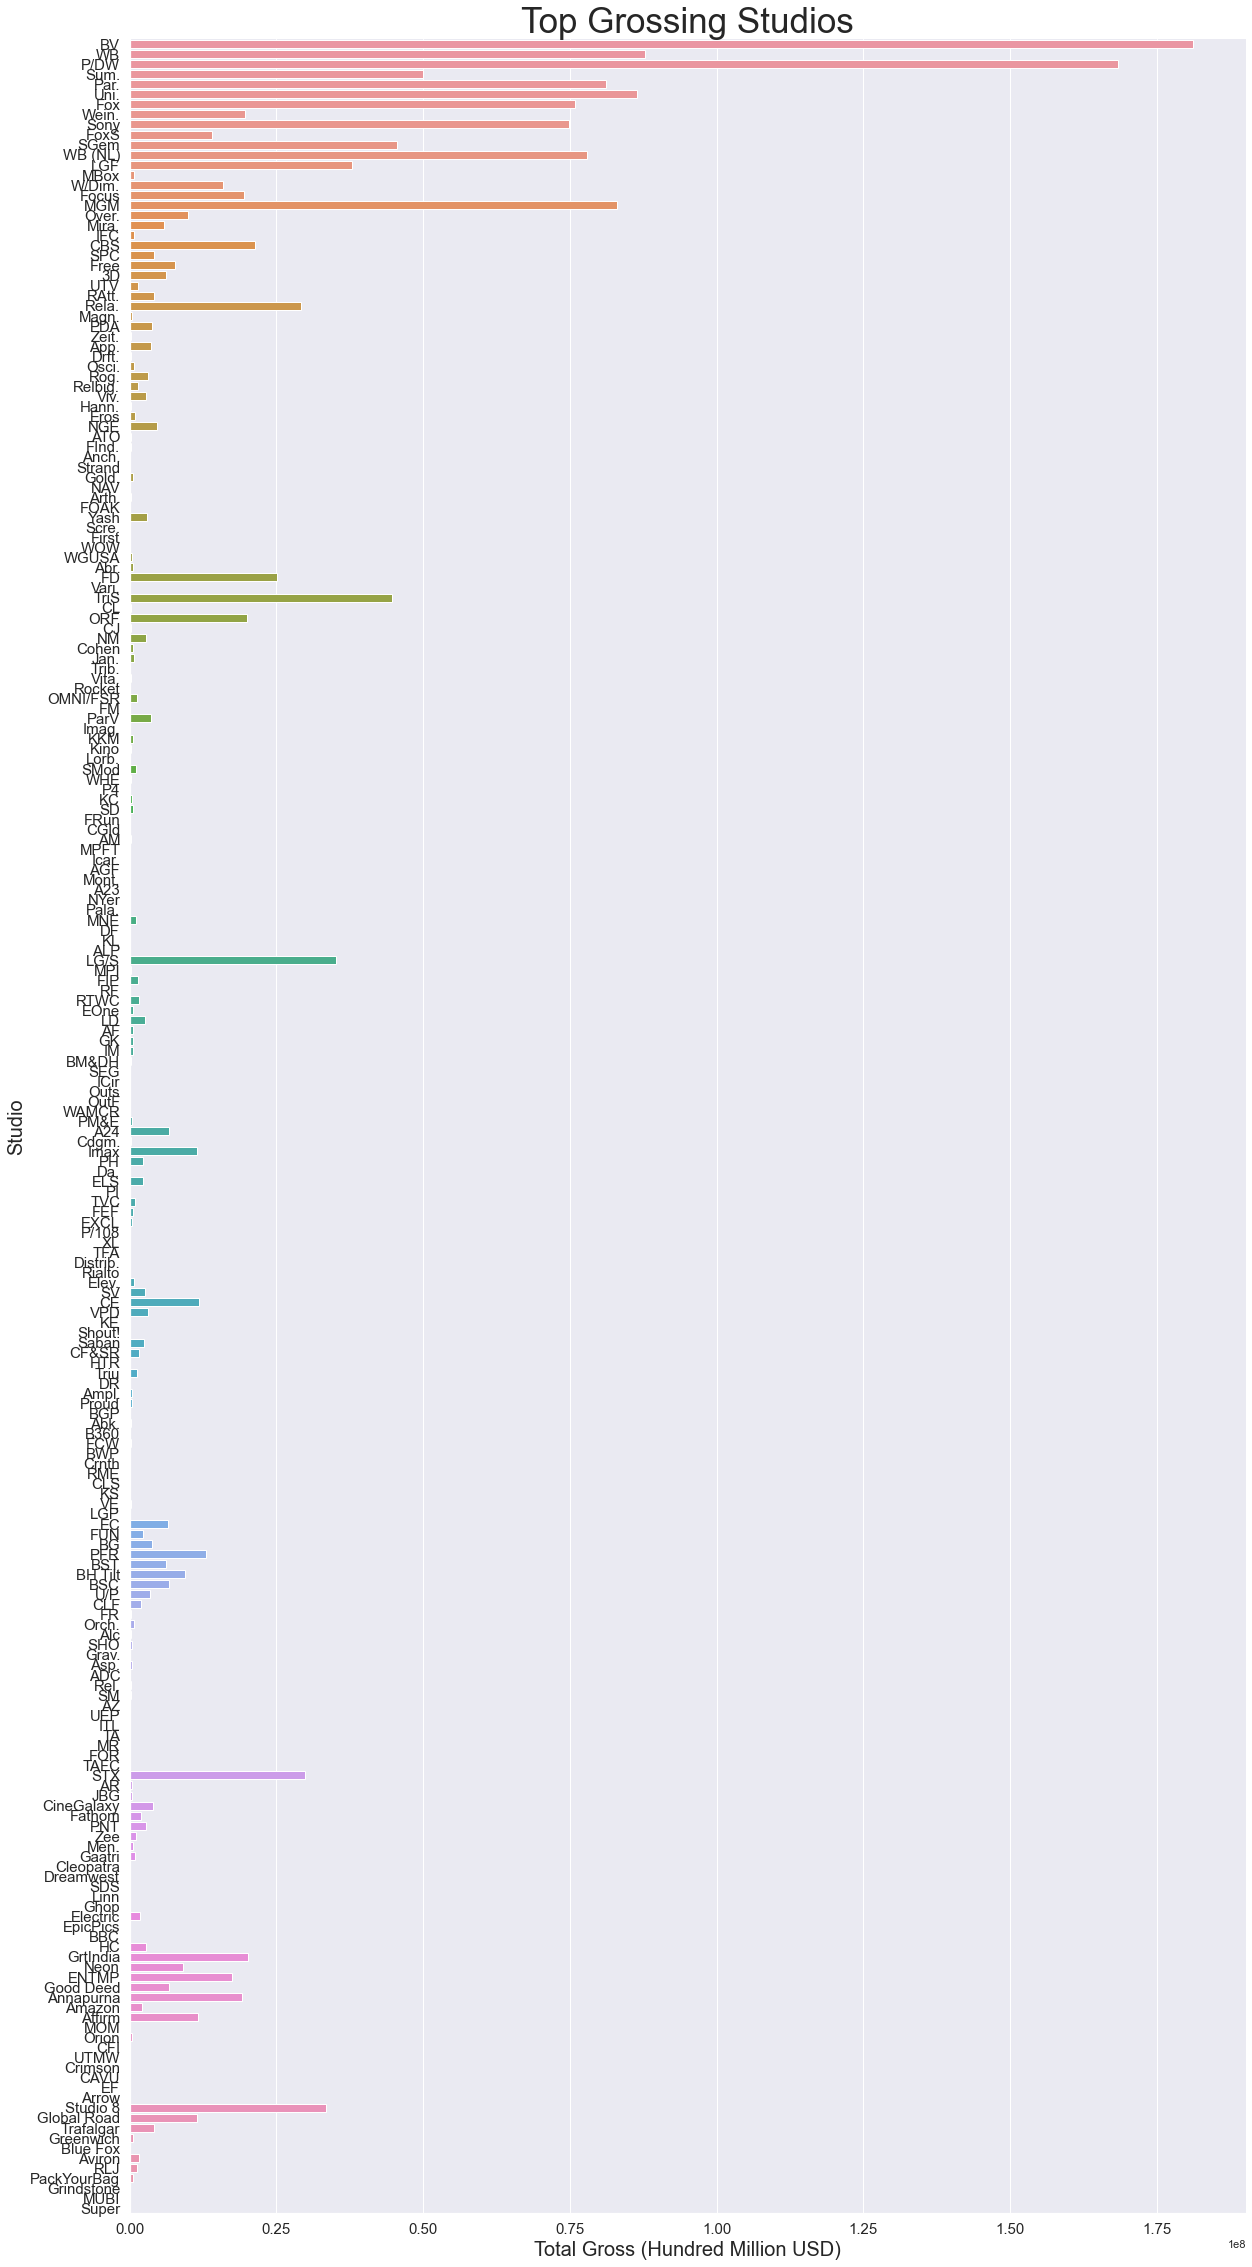

In [59]:
#top grossing studios
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.barplot(data=movie_basics_df, x="domestic gross", y="studio", ci=None)
sns.set(rc = {'figure.figsize':(20,40)})

plt.title('Top Grossing Studios', fontsize=35, fontname='Arial')
plt.xlabel('Total Gross (Hundred Million USD)', fontsize=20, fontname='Arial')
plt.ylabel('Studio', fontsize=20, fontname='Arial')
plt.xticks(fontsize=15, fontname='Arial')
plt.yticks(fontsize=15, fontname='Arial')


sns.despine()
plt.show()

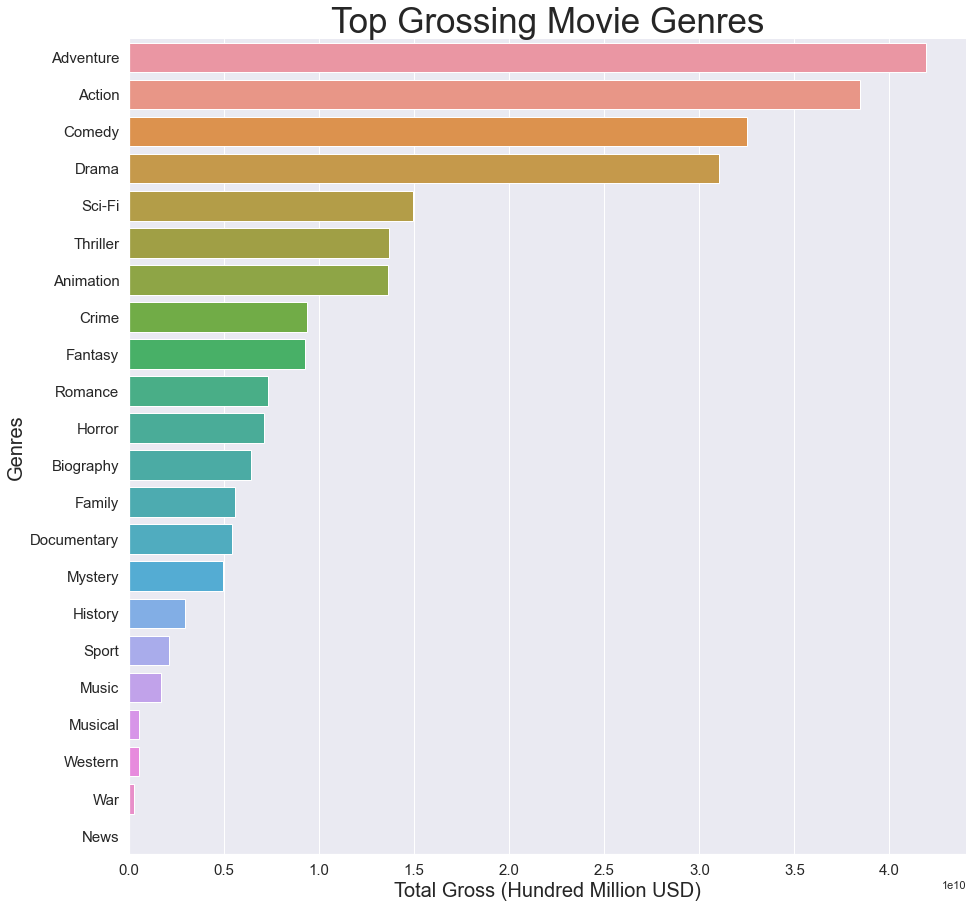

In [54]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.barplot(data=moviebasics_group_table, x="domestic_gross_x", y="genres", ci=None)
sns.set(rc = {'figure.figsize':(15,15)})

plt.title('Top Grossing Movie Genres', fontsize=35, fontname='Arial')
plt.xlabel('Total Gross (Hundred Million USD)', fontsize=20, fontname='Arial')
plt.ylabel('Genres', fontsize=20, fontname='Arial')
plt.xticks(fontsize=15, fontname='Arial')
plt.yticks(fontsize=15, fontname='Arial')


sns.despine()
plt.show()

In [28]:
#explode function to separate genres 
movie_basics['genres'] = movie_basics['genres'].str.split(',')
movie_basics_genres = movie_basics.explode('genres')
movie_basics_genres

,title_x,studio_x,domestic_gross_x,foreign_gross_x,year_x,movie_id,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000,652000000,2010,tt0435761,Toy Story 3,2010,103.0,Adventure
0,Toy Story 3,BV,415000000,652000000,2010,tt0435761,Toy Story 3,2010,103.0,Animation
0,Toy Story 3,BV,415000000,652000000,2010,tt0435761,Toy Story 3,2010,103.0,Comedy
1,Inception,WB,292600000,535700000,2010,tt1375666,Inception,2010,148.0,Action
1,Inception,WB,292600000,535700000,2010,tt1375666,Inception,2010,148.0,Adventure
...,...,...,...,...,...,...,...,...,...,...
3367,Beauty and the Dogs,Osci.,8900,NaN,2018,tt6776572,Beauty and the Dogs,2017,100.0,Thriller
3368,The Quake,Magn.,6200,NaN,2018,tt6523720,The Quake,2018,106.0,Action
3368,The Quake,Magn.,6200,NaN,2018,tt6523720,The Quake,2018,106.0,Drama
3368,The Quake,Magn.,6200,NaN,2018,tt6523720,The Quake,2018,106.0,Thriller


In [29]:
#group genres, domestic gross, studio 

moviebasics_group_table = (
    movie_basics_genres
    .groupby('genres')
    .sum()
    .reset_index()
    .sort_values('domestic_gross_x', ascending = False)[['genres', 'domestic_gross_x']]
)
moviebasics_group_table

,genres,domestic_gross_x
1,Adventure,41917777795
0,Action,38439147294
4,Comedy,32498090293
7,Drama,31051577493
17,Sci-Fi,14957617799
19,Thriller,13670993599
2,Animation,13622885198
5,Crime,9352541600
9,Fantasy,9288773299
16,Romance,7331808698


In [30]:
for i in range(0,3370):
    if movie_basics['year_x'][i] != movie_basics['start_year'][i]:
        movie_basics.drop(i, inplace = True)

In [31]:
import seaborn as sns 

In [33]:
rt_reviews = pd.read_csv('rt.reviews.tsv', delimiter="\t", header=0, encoding="unicode_escape'")
rt_reviews.head(6)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"


In [34]:
rt_info = pd.read_csv('rt.movie_info.tsv', delimiter = '\t', header=0, encoding="unicode_escape")
rt_info.head() 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [35]:
rt_reviews['review'][0:5]

0    A distinctly gallows take on contemporary fina...
1    It's an allegory in search of a meaning that n...
2    ... life lived in a bubble in financial dealin...
3    Continuing along a line introduced in last yea...
4               ... a perverse twist on neorealism... 
Name: review, dtype: object

In [36]:
rt_info['synopsis'][1]

"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site"

In [37]:
rt_reviews['review'][995:1000]

995    a respectful but inert advertisement for inter...
996    Ultimately, this vision of feudal Japan seems ...
997    Memo to Hollywood: Find another use for Keanu ...
998    The basics of the story remain unchanged, but ...
999    As impressive as these visual elements prove t...
Name: review, dtype: object

In [38]:
rt_info['synopsis'][18]

"From ancient Japan's most enduring tale, the epic 3D fantasy-adventure 47 Ronin is born. Keanu Reeves leads the cast as Kai, an outcast who joins Oishi (Hiroyuki Sanada), the leader of 47 outcast samurai. Together they seek vengeance upon the treacherous overlord who killed their master and banished their kind. To restore honor to their homeland, the warriors embark upon a quest that challenges them with a series of trials that would destroy ordinary warriors. 47 Ronin is helmed by visionary director Carl Erik Rinsch (The Gift). Inspired by styles as diverse as Miyazaki and Hokusai, Rinsch will bring to life the stunning landscapes and enormous battles that will display the timeless Ronin story to global audiences in a way that's never been seen before. -- (C) Universal"

In [39]:
#The movie IDs from RT_reviews and RT_info match so merge on ID 
rotten_tomatoes_df = rt_info.merge(rt_reviews, how='inner', on='id')
rotten_tomatoes_df.head(100)

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"Sometimes, even a little gratuitous nudity can...",1/4,rotten,James Berardinelli,1,ReelViews,"August 16, 2012"
96,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"Cronenberg turns a difficult, sometimes frustr...",C,rotten,Keith Phipps,1,AV Club,"August 16, 2012"
97,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"Easier to admire than to love, David Cronenber...",7.5/10,fresh,Alison Willmore,0,Movieline,"August 15, 2012"
98,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"Cosmopolis"" is Cronenberg's best film since ""e...",A-,fresh,Jordan Hoffman,1,Film.com,"August 15, 2012"


In [ ]:
#rating_x is content rating. rating_y is score out of 5. 
#rating_y has missing values so I will use the fresh column to determine movie rating 
#need to subset a dataframe that only shows ID, genre, rating_x (content review), review and fresh

In [40]:
rt_subset = rotten_tomatoes_df[['id', 'rating_x', 'genre', 'review', 'fresh']]
rt_subset.head()

,id,rating_x,genre,review,fresh
0,3,R,Drama|Science Fiction and Fantasy,A distinctly gallows take on contemporary fina...,fresh
1,3,R,Drama|Science Fiction and Fantasy,It's an allegory in search of a meaning that n...,rotten
2,3,R,Drama|Science Fiction and Fantasy,... life lived in a bubble in financial dealin...,fresh
3,3,R,Drama|Science Fiction and Fantasy,Continuing along a line introduced in last yea...,fresh
4,3,R,Drama|Science Fiction and Fantasy,... a perverse twist on neorealism...,fresh


In [ ]:
#What genre has the most "fresh" review?
#need count of frequency for fresh values based on content rating and genre
#to count the number of fresh values I would need to create a for loop 

In [41]:
rt_subset['genre']

0                        Drama|Science Fiction and Fantasy
1                        Drama|Science Fiction and Fantasy
2                        Drama|Science Fiction and Fantasy
3                        Drama|Science Fiction and Fantasy
4                        Drama|Science Fiction and Fantasy
                               ...                        
54427    Action and Adventure|Art House and Internation...
54428    Action and Adventure|Art House and Internation...
54429    Action and Adventure|Art House and Internation...
54430    Action and Adventure|Art House and Internation...
54431    Action and Adventure|Art House and Internation...
Name: genre, Length: 54432, dtype: object

In [42]:
#changed column names
rt_subset.rename(columns = {'fresh':'rating', 'rating_x':'contentrating'}, inplace = True)

/Users/brittneynitta-lee/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [43]:
rt_subset.fillna(0)

,id,contentrating,genre,review,rating
0,3,R,Drama|Science Fiction and Fantasy,A distinctly gallows take on contemporary fina...,fresh
1,3,R,Drama|Science Fiction and Fantasy,It's an allegory in search of a meaning that n...,rotten
2,3,R,Drama|Science Fiction and Fantasy,... life lived in a bubble in financial dealin...,fresh
3,3,R,Drama|Science Fiction and Fantasy,Continuing along a line introduced in last yea...,fresh
4,3,R,Drama|Science Fiction and Fantasy,... a perverse twist on neorealism...,fresh
...,...,...,...,...,...
54427,2000,R,Action and Adventure|Art House and Internation...,The real charm of this trifle is the deadpan c...,fresh
54428,2000,R,Action and Adventure|Art House and Internation...,0,rotten
54429,2000,R,Action and Adventure|Art House and Internation...,0,rotten
54430,2000,R,Action and Adventure|Art House and Internation...,0,rotten


In [44]:
#What genre has the most "fresh" review?
rt_subset['genre'] = rt_subset['genre'].str.split("|")
rt_subset_2 = rt_subset.explode('genre')

<ipython-input-44-92d735168571>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_subset['genre'] = rt_subset['genre'].str.split("|")


In [45]:
rt_subset_2['genre']

0                              Drama
0        Science Fiction and Fantasy
1                              Drama
1        Science Fiction and Fantasy
2                              Drama
                    ...             
54431           Action and Adventure
54431    Art House and International
54431                         Comedy
54431                          Drama
54431           Mystery and Suspense
Name: genre, Length: 120079, dtype: object

In [46]:
rating_map = {'fresh': 1, 'rotten' : -1}
rt_subset_2['numeric_rating'] = rt_subset_2['rating'].map(rating_map)
rt_subset_2

,id,contentrating,genre,review,rating,numeric_rating
0,3,R,Drama,A distinctly gallows take on contemporary fina...,fresh,1
0,3,R,Science Fiction and Fantasy,A distinctly gallows take on contemporary fina...,fresh,1
1,3,R,Drama,It's an allegory in search of a meaning that n...,rotten,-1
1,3,R,Science Fiction and Fantasy,It's an allegory in search of a meaning that n...,rotten,-1
2,3,R,Drama,... life lived in a bubble in financial dealin...,fresh,1
...,...,...,...,...,...,...
54431,2000,R,Action and Adventure,NaN,fresh,1
54431,2000,R,Art House and International,NaN,fresh,1
54431,2000,R,Comedy,NaN,fresh,1
54431,2000,R,Drama,NaN,fresh,1


In [47]:
genre_numeric_rating = (
    rt_subset_2
    .groupby('genre')
    .sum()
    .reset_index()
    .sort_values('numeric_rating', ascending = False)[['genre', 'numeric_rating']]
)
genre_numeric_rating

,genre,numeric_rating
8,Drama,10286
5,Comedy,3958
3,Art House and International,2334
15,Romance,2248
14,Mystery and Suspense,2002
0,Action and Adventure,1756
4,Classics,1153
12,Kids and Family,1119
1,Animation,929
16,Science Fiction and Fantasy,698


In [57]:
#save content rating as new df 
content_numeric_rating = (
    rt_subset_2
    .groupby('numeric_rating')
    .sum()
    .reset_index()
    .sort_values('numeric_contentrating', ascending = False)[['numeric_rating', 'numeric_contentrating']]
)
content_numeric_rating

,numeric_rating,numeric_contentrating
1,1,78911.0
0,-1,51768.0


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

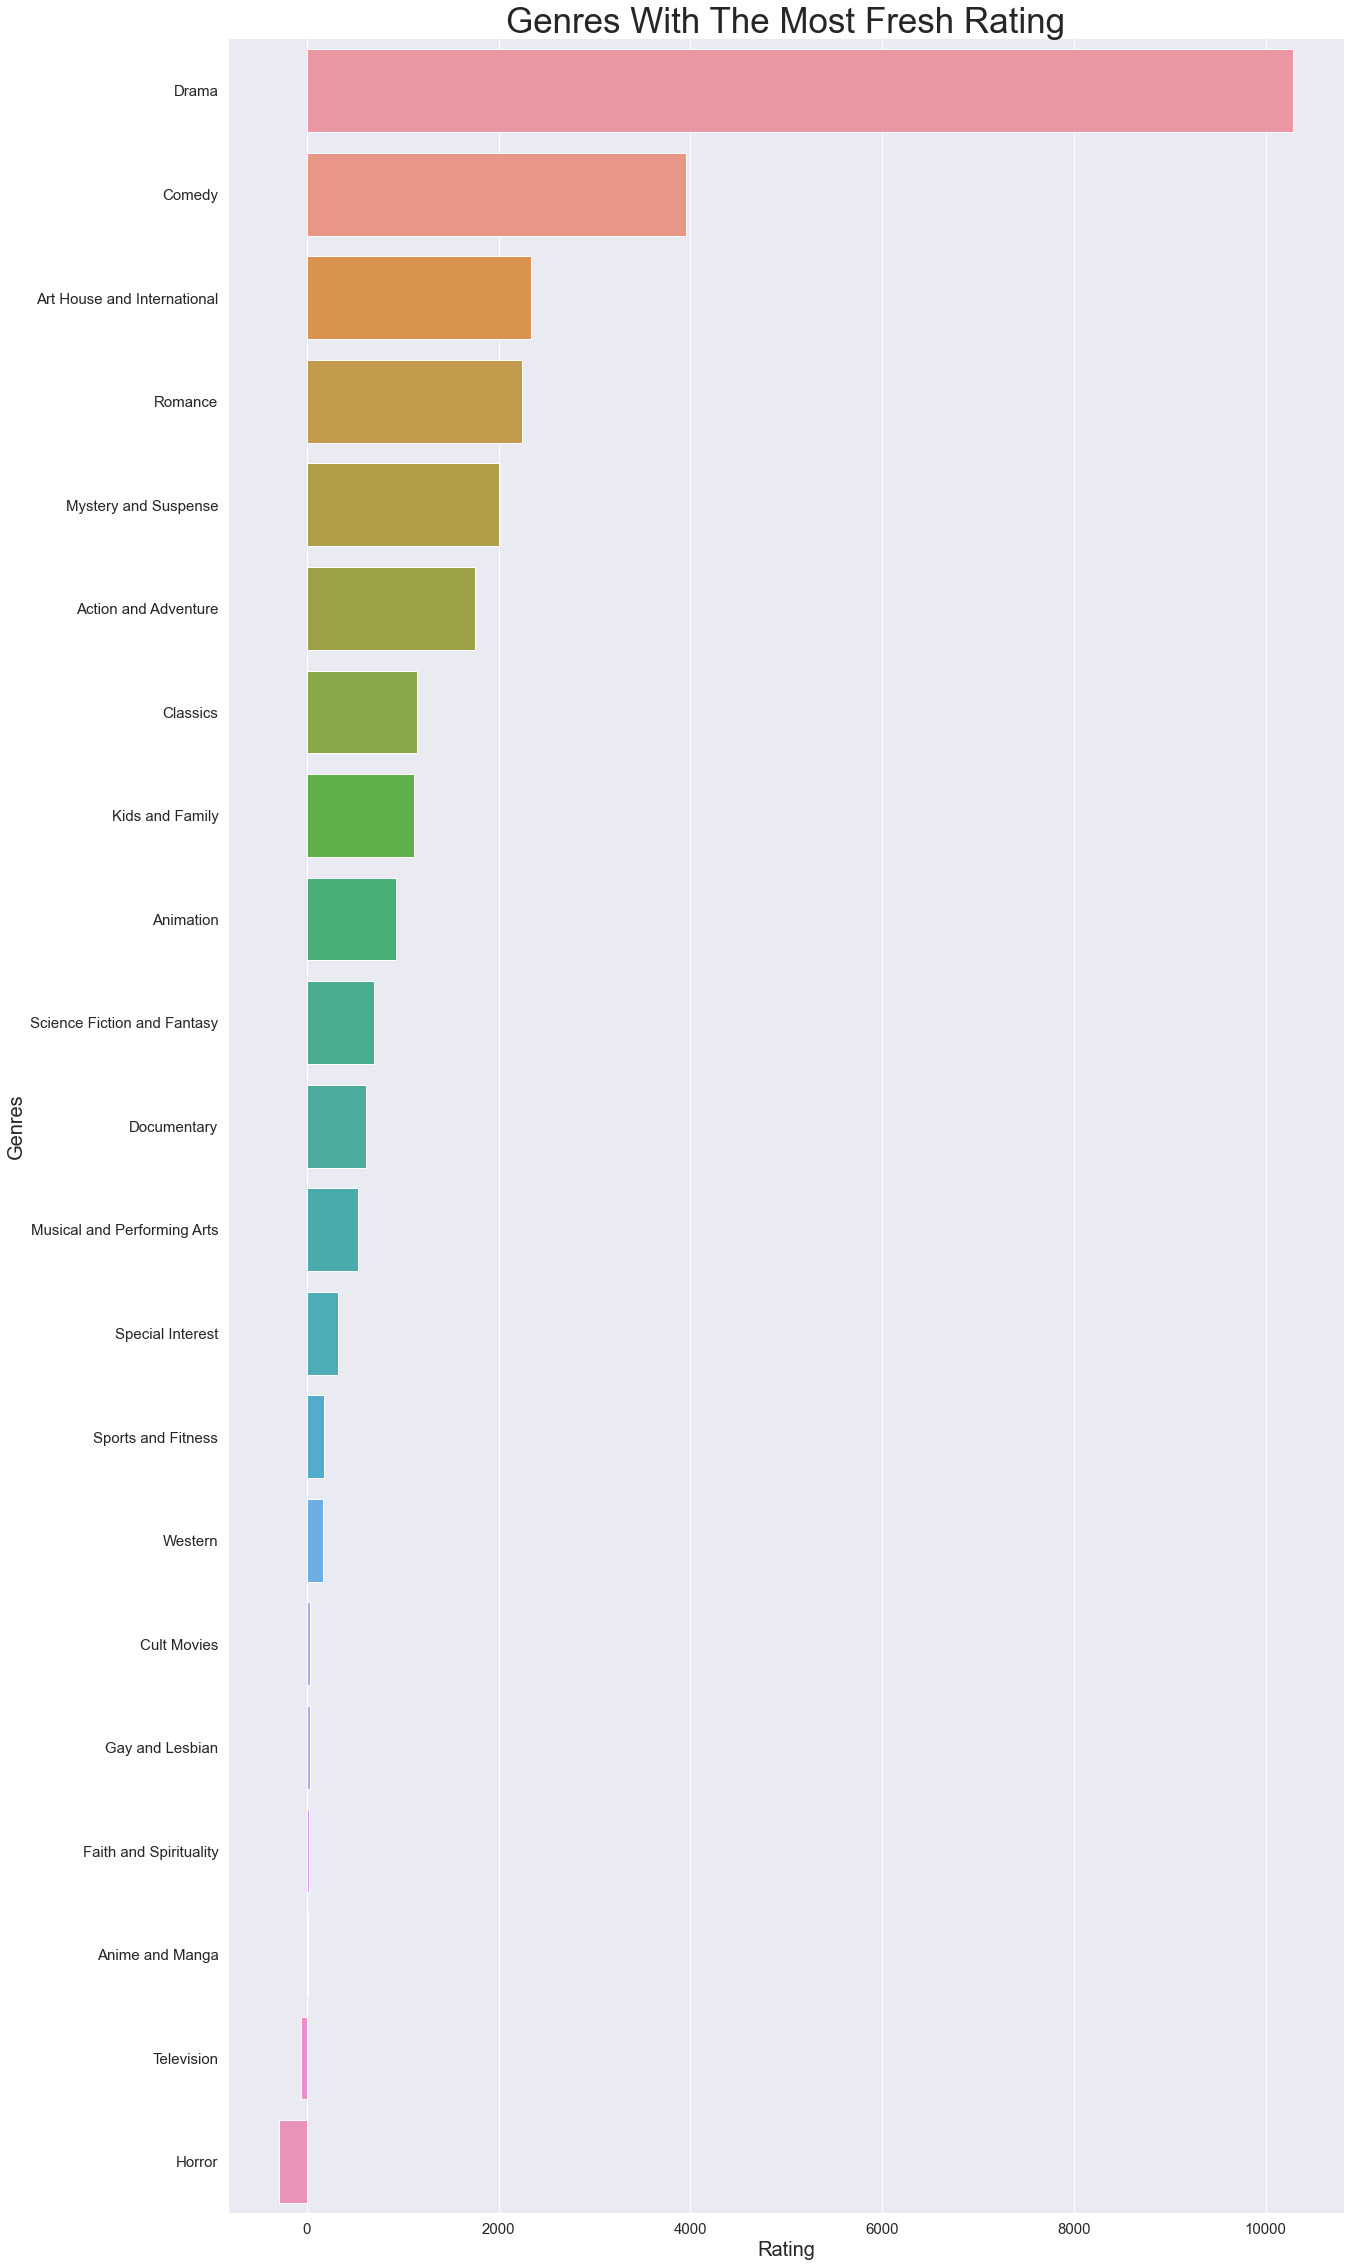

In [50]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.barplot(data=genre_numeric_rating, x="numeric_rating", y="genre", ci=None)
sns.set(rc = {'figure.figsize':(20,15)})

plt.title('Genres With The Most Fresh Rating', fontsize=35, fontname='Arial')
plt.xlabel('Rating', fontsize=20, fontname='Arial')
plt.ylabel('Genres', fontsize=20, fontname='Arial')
plt.xticks(fontsize=15, fontname='Arial')
plt.yticks(fontsize=15, fontname='Arial')


sns.despine()
plt.show()

In [51]:
rt_subset_2['contentrating'].unique()

array(['R', 'PG', 'PG-13', nan, 'NR', 'G'], dtype=object)

In [52]:
#What movie content rating has the most fresh reviews
 

contentrating_map = {'R': 0, 'PG' : 1, 'PG-13' : 2, 'NR' : 3, 'G' : 4}
rt_subset_2['numeric_contentrating'] = rt_subset_2['contentrating'].map(contentrating_map)
rt_subset_2

,id,contentrating,genre,review,rating,numeric_rating,numeric_contentrating
0,3,R,Drama,A distinctly gallows take on contemporary fina...,fresh,1,0.0
0,3,R,Science Fiction and Fantasy,A distinctly gallows take on contemporary fina...,fresh,1,0.0
1,3,R,Drama,It's an allegory in search of a meaning that n...,rotten,-1,0.0
1,3,R,Science Fiction and Fantasy,It's an allegory in search of a meaning that n...,rotten,-1,0.0
2,3,R,Drama,... life lived in a bubble in financial dealin...,fresh,1,0.0
...,...,...,...,...,...,...,...
54431,2000,R,Action and Adventure,NaN,fresh,1,0.0
54431,2000,R,Art House and International,NaN,fresh,1,0.0
54431,2000,R,Comedy,NaN,fresh,1,0.0
54431,2000,R,Drama,NaN,fresh,1,0.0


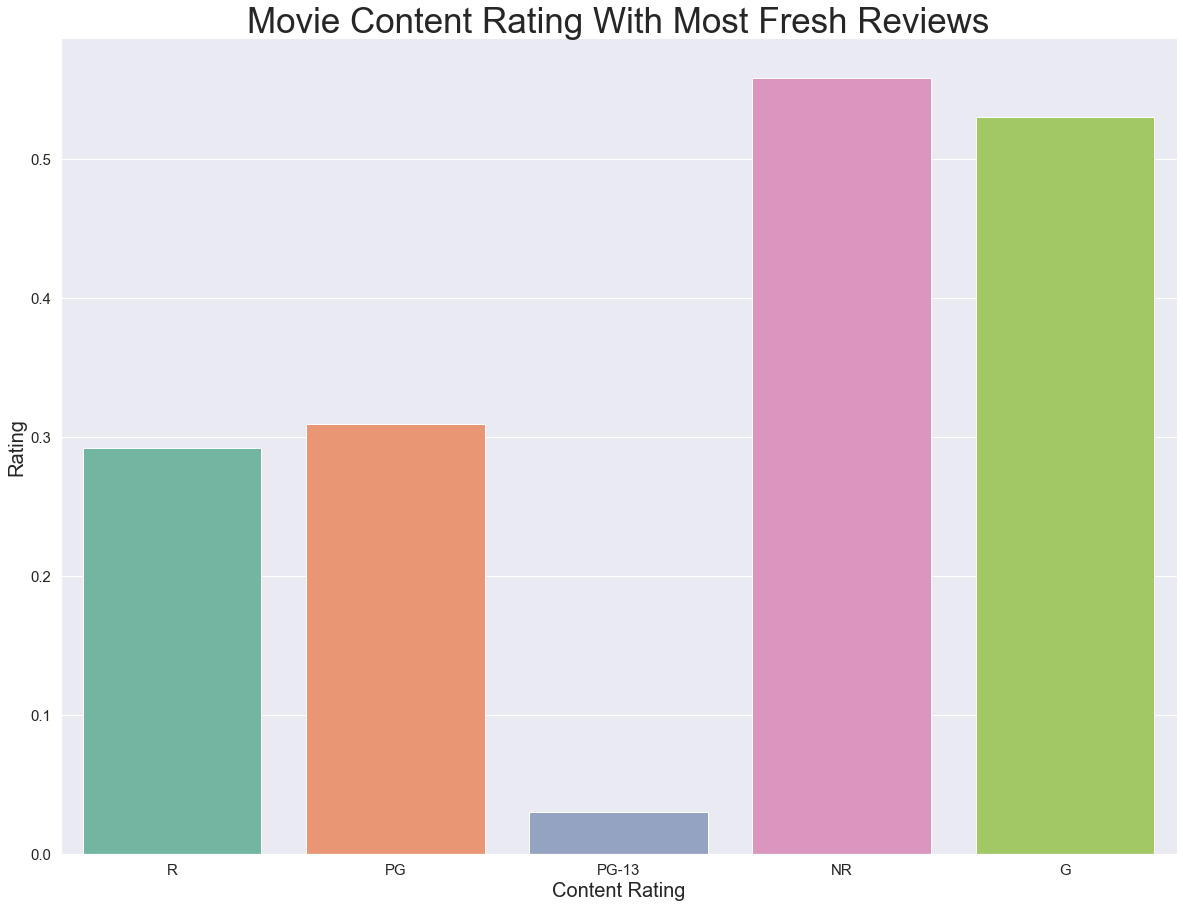

In [53]:
#What movie content rating has the most fresh reviews
sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.barplot(data=rt_subset_2, x="contentrating", y="numeric_rating", ci=None)
sns.set(rc = {'figure.figsize':(15,15)})

plt.title('Movie Content Rating With Most Fresh Reviews', fontsize=35, fontname='Arial')
plt.xlabel('Content Rating', fontsize=20, fontname='Arial')
plt.ylabel('Rating', fontsize=20, fontname='Arial')
plt.xticks(fontsize=15, fontname='Arial')
plt.yticks(fontsize=15, fontname='Arial')


sns.despine()
plt.show()